# Handwritten digits classification using CNN


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape,y_test.shape

((60000,), (10000,))

**Dataset contain 70000 records**

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Data Visualization

5


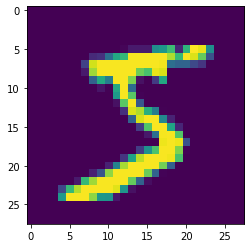

In [7]:
plt.imshow(X_train[0])
print(y_train[0])

In [8]:
y_train[0]

5

4


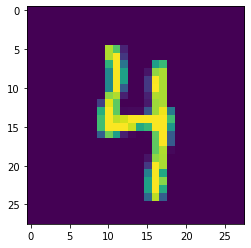

In [9]:
plt.imshow(X_train[1110])
print(y_train[1110])

In [10]:
y_train[1110]

4

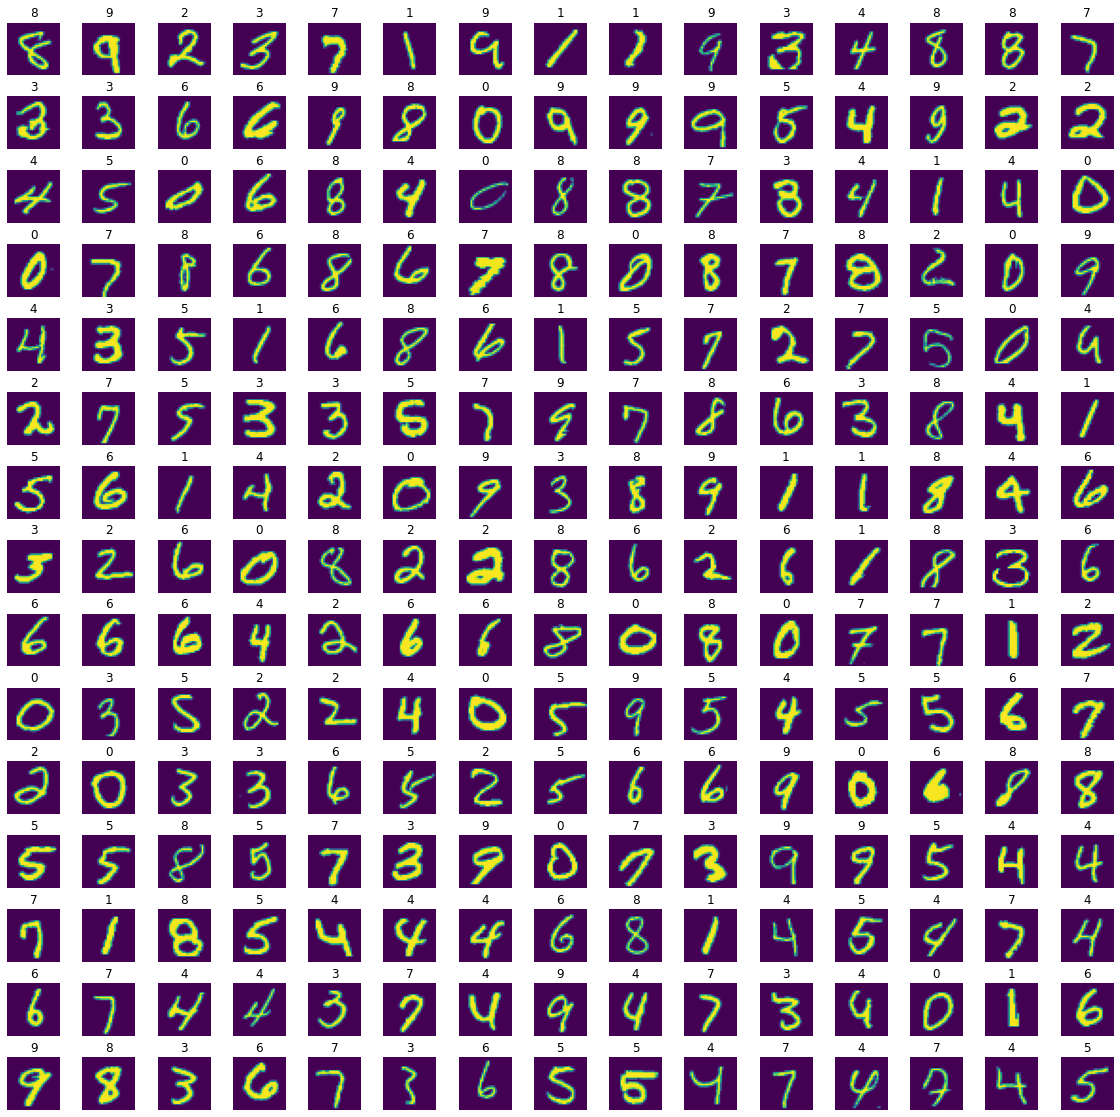

In [11]:
fig,axes = plt.subplots(15,15,figsize = (20,20))
axes = axes.ravel();

for i in np.arange(0,15*15):
    index_num = np.random.randint(0,50000)
    axes[i].imshow(X_train[index_num])
    axes[i].set_title(y_train[index_num])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Data Preprocessing

In [12]:
X_train = X_train / 255
X_test = X_test / 255


In [13]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow

In [15]:
## keras documentation

stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=False,start_from_epoch=0)


In [16]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',input_shape=(28,28,1)))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D( 64,  (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [18]:
model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax')) # output layer 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [26]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size= 20,epochs = 30,callbacks= [stopping])

Epoch 1/30
2010/2010 [==============================] - 60s 29ms/step - loss: 0.4513 - accuracy: 0.8564 - val_loss: 0.1318 - val_accuracy: 0.9611
Epoch 2/30
2010/2010 [==============================] - 55s 28ms/step - loss: 0.1795 - accuracy: 0.9462 - val_loss: 0.0904 - val_accuracy: 0.9715
Epoch 3/30
2010/2010 [==============================] - 53s 26ms/step - loss: 0.1418 - accuracy: 0.9563 - val_loss: 0.0839 - val_accuracy: 0.9749
Epoch 4/30
2010/2010 [==============================] - 55s 27ms/step - loss: 0.1220 - accuracy: 0.9631 - val_loss: 0.0686 - val_accuracy: 0.9793
Epoch 5/30
2010/2010 [==============================] - 53s 26ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.0667 - val_accuracy: 0.9804
Epoch 6/30
2010/2010 [==============================] - 61s 30ms/step - loss: 0.1001 - accuracy: 0.9698 - val_loss: 0.0627 - val_accuracy: 0.9819
Epoch 7/30
2010/2010 [==============================] - 59s 29ms/step - loss: 0.0919 - accuracy: 0.9716 - val_loss: 0.0614 -

### Model Evaluation 

In [28]:
print("Test Loss and Test Accuracy: {}".format(model.evaluate(X_test,y_test)))

313/313 [==============================] - 3s 9ms/step - loss: 0.0413 - accuracy: 0.9884
Test Loss and Test Accuracy: [0.04130220785737038, 0.9883999824523926]


In [30]:
pred_class=model.predict(X_test) 

313/313 [==============================] - 3s 11ms/step


In [31]:
pred_class

array([[9.1497495e-12, 2.2058609e-07, 1.8961665e-04, ..., 9.9975872e-01,
        8.4467857e-08, 5.8051000e-07],
       [1.0447751e-07, 1.8255719e-08, 9.9999911e-01, ..., 3.7038234e-07,
        4.1307928e-08, 2.2313086e-08],
       [2.0500336e-07, 9.9999100e-01, 3.7901709e-06, ..., 3.1056884e-06,
        1.4709487e-06, 4.3341039e-08],
       ...,
       [5.4427669e-12, 1.5081135e-08, 1.6177157e-09, ..., 2.1044171e-09,
        6.2426757e-08, 1.6378952e-07],
       [3.8639465e-07, 9.7765351e-09, 1.4849550e-07, ..., 1.5586785e-08,
        1.5204904e-03, 1.7420343e-03],
       [1.3988055e-06, 1.9356271e-10, 1.1093805e-07, ..., 3.4235428e-16,
        2.4870662e-08, 1.9227688e-08]], dtype=float32)

In [32]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
pred_class = pred_class.argmax(1)
pred_class

array([7, 2, 1, ..., 4, 5, 6])

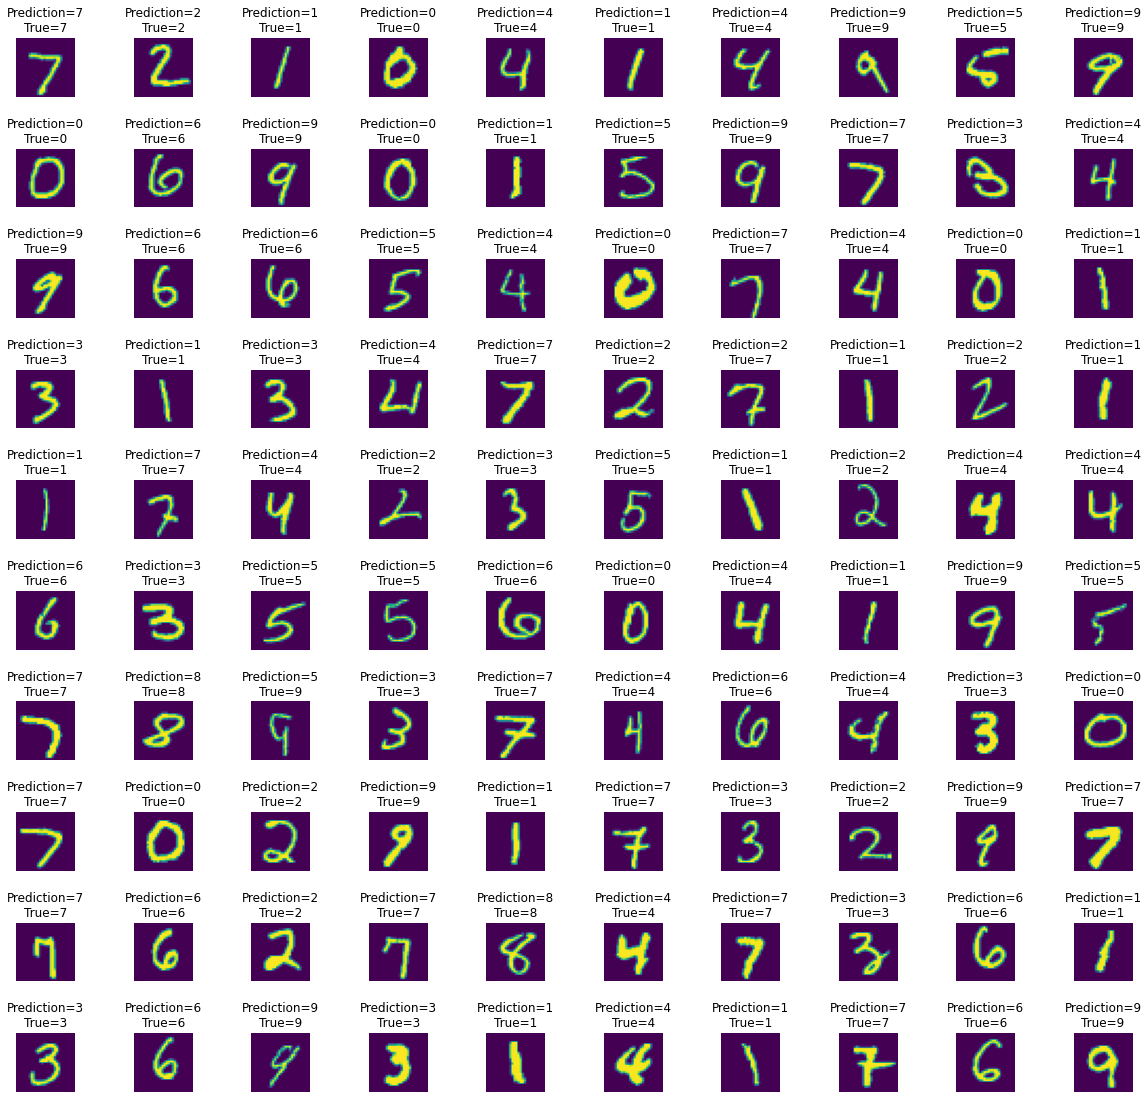

In [36]:
fig,axes = plt.subplots(10,10,figsize = (20,20))
axes = axes.ravel();

for i in np.arange(0,100):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\nTrue={}".format(pred_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

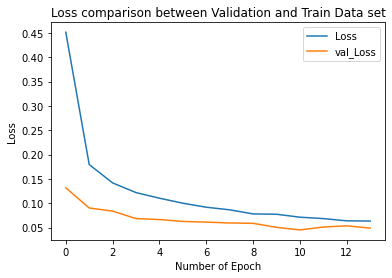

In [42]:
plt.plot(model_history.history['loss'],label ='Loss')
plt.plot(model_history.history['val_loss'],label = 'val_Loss')
plt.title('Loss comparison between Validation and Train Data set')
plt.ylabel('Loss')
plt.xlabel('Number of Epoch')
plt.legend(loc='best')
plt.show()

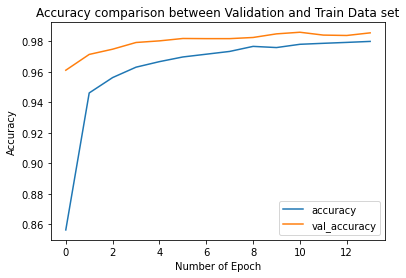

In [43]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

cm = confusion_matrix(y_test,pred_class)
cm

array([[ 972,    1,    0,    1,    0,    0,    3,    1,    0,    2],
       [   0, 1133,    0,    1,    0,    0,    0,    1,    0,    0],
       [   3,    1, 1015,    1,    2,    0,    2,    8,    0,    0],
       [   0,    0,    3, 1002,    0,    3,    0,    1,    1,    0],
       [   0,    1,    0,    0,  976,    0,    1,    0,    1,    3],
       [   4,    0,    0,    3,    0,  880,    1,    3,    1,    0],
       [   3,    4,    1,    0,    1,    2,  946,    0,    1,    0],
       [   0,    4,   11,    0,    0,    1,    0, 1010,    0,    2],
       [   2,    1,    1,    1,    1,    1,    1,    0,  964,    2],
       [   1,    1,    0,    0,    4,    7,    1,    6,    3,  986]])

In [40]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
print(accuracy_score(y_test,pred_class))

0.9884
